In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

In [5]:
qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')

In [9]:
qc = QuantumCircuit(qreg, creg)

In [10]:
qc.h(0)
qc.rz(Parameter('theta'), 0)
qc.h(0)
qc.measure(qreg, creg)

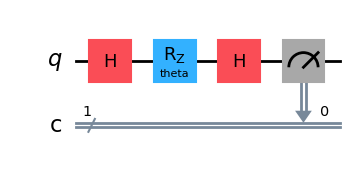

In [11]:
qc.draw('mpl')

In [12]:
from qiskit.primitives import StatevectorSampler

In [13]:
sampler = StatevectorSampler()

In [15]:
import numpy as np

In [16]:
theta_vals = np.linspace(0, 10, 100)

In [18]:
num_shots = 100

In [19]:
job = sampler.run([(qc, theta_vals)], shots = num_shots)

In [20]:
results = job.result()[0]

In [21]:
lst_m0 = []
lst_m1 = []
for i in range(len(theta_vals)):
    result = results.data.c.get_counts(i)
    lst_m0.append(result.get('0', 0))
    lst_m1.append(result.get('1', 0))

In [23]:
p0 = np.array(lst_m0) / num_shots
p1 = np.array(lst_m1) / num_shots

In [24]:
from matplotlib import pyplot as plt

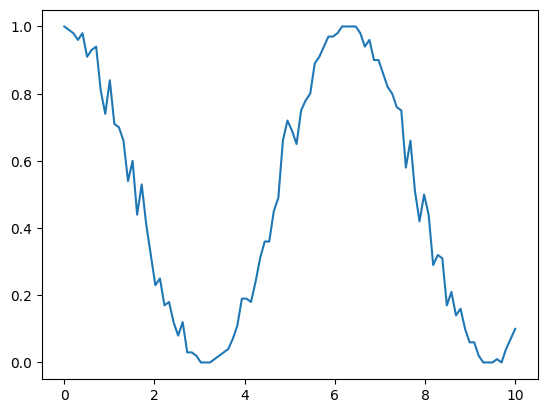

In [25]:
plt.plot(theta_vals, p0)

# Estimator

In [26]:
qc2 = QuantumCircuit(1)

In [27]:
qc2.h(0)
qc2.rz(Parameter('theta'), 0)
qc2.h(0)

In [28]:
from qiskit.primitives import StatevectorEstimator

In [29]:
estimator = StatevectorEstimator()

In [31]:
from qiskit.quantum_info import SparsePauliOp

In [32]:
op = SparsePauliOp('Z')

In [35]:
job = estimator.run([(qc2, op, theta_vals)])

In [36]:
results = job.result()[0]

In [37]:
data = results.data.evs

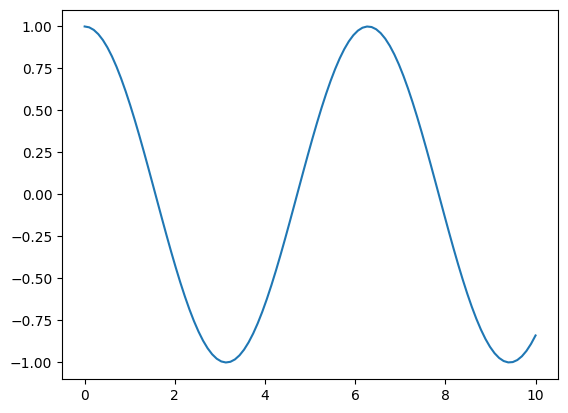

In [39]:
plt.plot(theta_vals, data)

# Two - site Ising model

In [40]:
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')

In [41]:
qc = QuantumCircuit(qreg, creg)

In [42]:
qc.h(0)
qc.cx(0, 1)
qc.measure(qreg, creg)

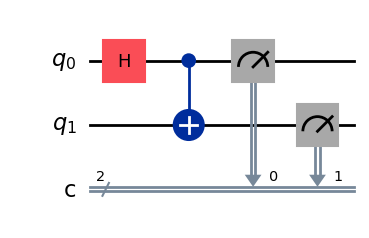

In [43]:
qc.draw('mpl')

In [44]:
sampler = StatevectorSampler()

In [45]:
num_shots = 100

In [69]:
job = sampler.run([(qc, [])], shots = num_shots)

In [70]:
results = job.result()[0]

In [71]:
lst_m00 = []
lst_m11 = []

In [72]:
results.data.c.get_counts()

{'11': 44, '00': 56}

In [57]:
for i in range(len(theta_vals)):
    result = results.data.c.get_counts(i)
    lst_m00.append(result.get('00', 0))
    lst_m11.append(result.get('11', 0))

In [58]:
p00 = np.array(lst_m00) / num_shots
p11 = np.array(lst_m11) / num_shots

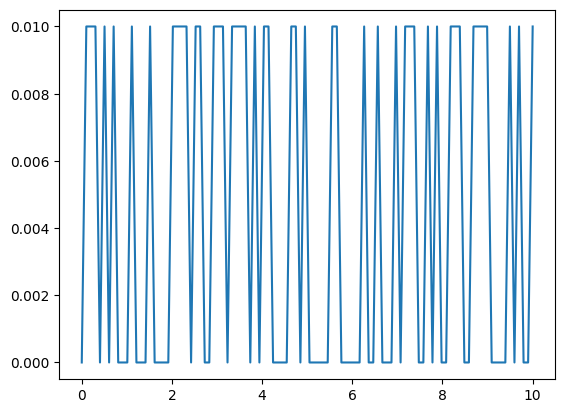

In [59]:
plt.plot(theta_vals, p00)

# two-site Ising time evolution

In [73]:
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')

In [74]:
qc = QuantumCircuit(qreg, creg)

In [75]:
qc.h([0,1])

In [77]:
qc.cx(0,1)
qc.rz(Parameter('theta'), 1)
qc.cx(0,1)
qc.h([0,1])

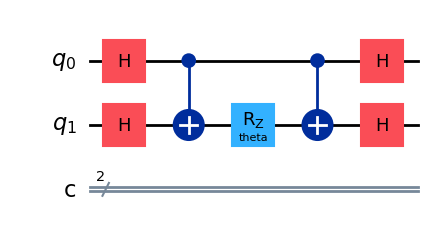

In [78]:
qc.draw('mpl')

In [79]:
qc.measure(qreg, creg)

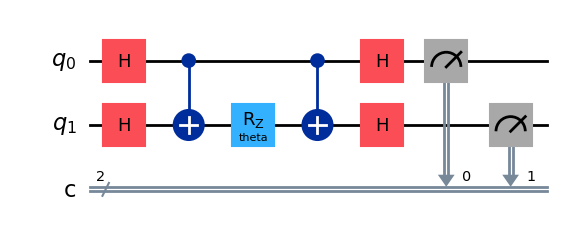

In [80]:
qc.draw('mpl')

In [81]:
sampler = StatevectorSampler()

In [82]:
theta_vals = np.linspace(-np.pi, np.pi, 100)

In [85]:
job = sampler.run([(qc, theta_vals)], shots = num_shots)

In [87]:
results = job.result()[0]

In [88]:
lst_m00 = []
lst_m11 = []

In [89]:
for i in range(len(theta_vals)):
    result = results.data.c.get_counts(i)
    lst_m00.append(result.get('00', 0))
    lst_m11.append(result.get('11', 0))

In [90]:
p00 = np.array(lst_m00) / num_shots
p11 = np.array(lst_m11) / num_shots

In [94]:
exact = np.cos(theta_vals / 2) ** 2

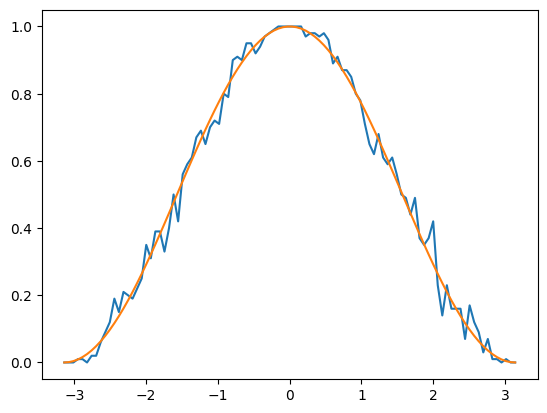

In [95]:
plt.plot(theta_vals, p00)
plt.plot(theta_vals, exact)

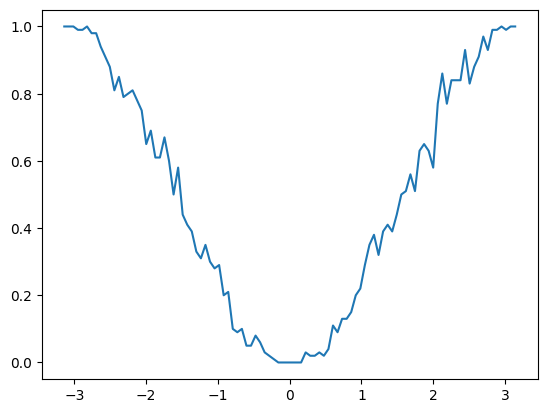

In [96]:
plt.plot(theta_vals, p11)